In [22]:

class LinearnaRegresija2D:

    def __init__(self):
        self.x = 0
        self.y = 0

    # error
    def fit(self, x, y, error):
        self.x = x
        self.y = y
        
        # PRIPAZI NA POSTOJANOST PODATKA
        if x.size == 0 or y.size == 0:
            print("Prazni podaci")
            return 0
        
        if len(x)!=len(y):
            print("X i Y nisu iste duljine")
            return 0
        
        else:
            
            # POBRINE SE DA SU OBOJE np.array
            tip = type(x)
            if str(tip) != "<class 'numpy.ndarray'>":
                x = np.array(x)
            
            tip = type(y)
            if str(tip) != "<class 'numpy.ndarray'>":
                y = np.array(y)
            
            

            
            # PRONAĐE SREDIŠNJU TOČKU (x1,y1) I ONDA TRAŽI SJECIŠTE S Y OSI (0,y0) I NAGIB
          
            self.sredisnjaTocka = (x.mean(),y.mean())
            
            self.rekurzivna(error = error)



    def rekurzivna(self, error, najmanjaUdaljenost = 99999999, zbrojUdaljenosti = 0, korak = 20, od = 0, do = 180, nagib = 0, y0 = None, novi_od = 0):

    ## funkcionira na principu rundi s 9-10 iteracija po rundi
    ## rekurzivno pozivamo funkciju, podižući joj početnu vrijednost raspona unutar runde, sve dok se raspon ne obavi do kraja
    ## zatim prelazimo na sljedeću rundu, u kojoj suzimo raspon i smanjimo korak.
    ## na taj način na početku podijelimo 360 stupnjeva na 9 pravaca, gledamo koji je najbolje pasao
    ## dalje, podijelimo 40 stupnjeva na 10 pravaca, gledamo koji je najbolje pasao
    ## dalje podijelimo 4 stupnja na 10 pravaca...


    ## Runde:

    # np.arrange(od,do,korak)

    # prva runda (0,180,20) - traži mean_sqr_err pravca s kutem alpha = 0
    #   pozove sljedeću iteraciju s parametrima (20,180,20) te traži mean_sqr_err pravca s kutem alpha = 20
    #   pozove sljedeću iteraciju s parametrima (40,180,20) te traži mean_sqr_err pravca s kutem alpha = 40
    #   . . .
    #   nađe najbolji nagib recimo 60. od = 60-(20/2). do = 60+(20/2)

    # druga runda (50,70,2)
    #   nađe najbolji nagib recimo 68. od = 68-(2/2). do = 68+(20/2)

    # treca runda (67,69,0.2)
    #   nađe najbolji nagib recimo 68.04. od = 68.04-(0.2/2). do = 68.04+(0.2/2)

    # cetvrta runda (68.03,68.05,0.02)...


    ## KRAJNJI NAM JE CILJ DOBITI y0, nagib i mean_abs_err. KAKO BI MOGLI PLOTATI GRAF, TE PROCIJENITI I USPOREDITI GREŠKU
        if korak < 0.000001:
            self.y0 = y0
            self.nagib = nagib
            self.mean_err = najmanjaUdaljenost/len(self.x)
            return 1

        
        ## ako je završilo s trenutnim rasponom, odi u sljedeću rundu 
        if od >= do:
            od = novi_od-korak/2
            do = novi_od+korak/2
            korak /= 10
            
            # od range(180,180,20) i nagib = 50, napravi range(40,60,2) itd.
            # od range(40,60,2) i nagib = 51, napravi range(50,52,0.2)
            return self.rekurzivna(error = error, najmanjaUdaljenost = najmanjaUdaljenost, od = od, do = do, korak = korak, nagib = nagib,y0 = y0)

        
        
        ## inače nastavljamo dalje s kodom, tražimo najmanje apsolutne udaljenosti i iteriramo

        # skupimo elemente potrebne za jednadžbu pravca. (y = alpha*x + y0)

                # jednadžba za alpha je čudnovata, bolje funkcionira ovako. više nisam ni siguran zašto ali ovako odradi puniji spektar kruga
        alpha = (od*math.pi)/180
        b = self.sredisnjaTocka[1] - alpha*self.sredisnjaTocka[0]

        # pomoću njih izračunamo zbroj udaljenosti svih točaka (x,y) od pravca. Udaljenost računamo samo po y osi, jer su im X vrijednosti iste!
        for i in range(len(self.x)):

            # prema dobivenoj jednadžbi pravca saznamo naš y za zadani x
            y1 = self.x[i] * alpha + b

            if error == 'abs':
                udaljenost = abs(self.y[i] - y1)
            elif error == 'sqr':
                udaljenost = (self.y[i] - y1)**2
            zbrojUdaljenosti += udaljenost

        
        if zbrojUdaljenosti <= najmanjaUdaljenost:
            nagib = alpha
            najmanjaUdaljenost = zbrojUdaljenosti
            y0 = b
            novi_od = od
            
        

        ## pošto nije završilo s trenutnim rasponom, iteriraj dalje

        return self.rekurzivna(error = error, najmanjaUdaljenost = najmanjaUdaljenost, od = od+korak, do = do, korak = korak, nagib = nagib, y0 = y0,novi_od = novi_od)




    def predict(self,X):
        y_pred = [x*self.nagib + self.y0 for x in X]
        return y_pred
            

In [3]:




                                                                    ## TU POSTAVIMO POTREBITE STVARI ##

import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from random import randint

clfMoj = LinearnaRegresija2D()

clfPravi = LinearRegression()









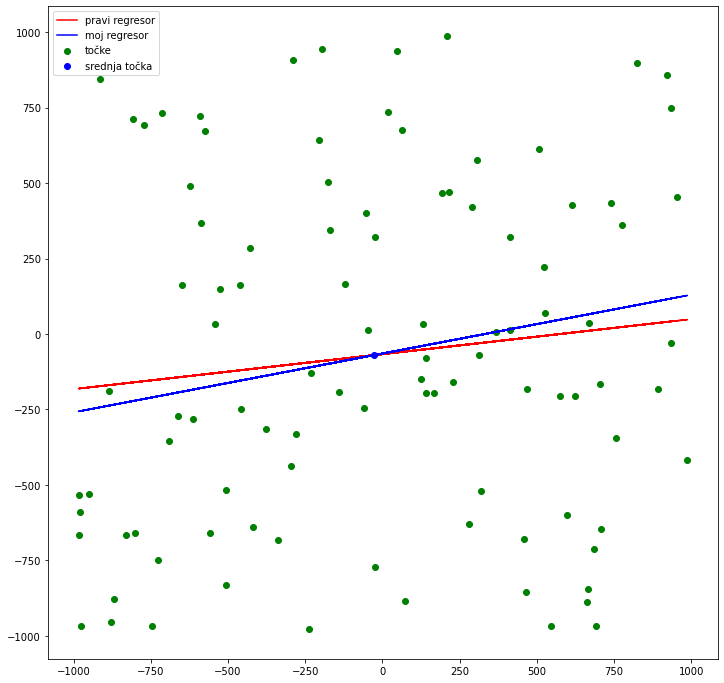

pravi error: 478.0359656621812
moj error 475.8722662934247


In [26]:



                                                                        ##  PRVI TEST ##

# testiramo i plotamo rezultate nad nekim brojem točaka, oslanjajući se na mjerilo mean_absolute_error

def test1(range_x=(-1000,1000), range_y=(-1000,1000), num_points=100):

    x = np.array([randint(range_x[0],range_x[1]) for x in range(num_points)])
    y = np.array([randint(range_y[0],range_y[1]) for x in range(num_points)])

    clfPravi.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))
    clfMoj.fit(x,y,error = 'abs')


    y_pred_pravi = clfPravi.predict(np.array(x).reshape(-1,1))
    y_pred_moj = clfMoj.predict(x)

    plt.figure(figsize=(12,12))
    plt.scatter(x,y,color = 'green')
    plt.scatter(x.mean(),y.mean(), color = 'blue')
    plt.plot(x,y_pred_pravi,color = 'red')
    plt.plot(x,y_pred_moj,color = 'blue')
    plt.legend(["pravi regresor","moj regresor", "točke", "srednja točka"])
    plt.show()


    pravi_error = mean_absolute_error(y,y_pred_pravi)
    moj_error = mean_absolute_error(y,y_pred_moj)

    print("pravi error:",pravi_error)
    print("moj error", moj_error)

test1()

In [30]:



                                                                        ##  DRUGI TEST ##

## u ovome nećemo plotati već samo gledati rezultate mean_absolute_error, usporediti ih i vidjeti tko je postigao manju grešku
## ako je moj regresor imao manju grešku, funkcija vraća 1

def test2(range_x=(-1000,1000), range_y=(-1000,1000), num_points=100):
    
    x = np.array([randint(range_x[0],range_x[1]) for x in range(num_points)])
    y = np.array([randint(range_y[0],range_y[1]) for x in range(num_points)])

    clfPravi.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))
    clfMoj.fit(x,y,error = 'abs')

    y_pred_pravi = clfPravi.predict(np.array(x).reshape(-1,1))
    y_pred_moj = clfMoj.predict(x)


    pravi_error = mean_absolute_error(y,y_pred_pravi)
    moj_error = mean_absolute_error(y,y_pred_moj)

    #print("pravi error:",pravi_error)
    #print("moj error", moj_error)

    if pravi_error > moj_error:
        return 1
    else:
        return 0

test2()

1

In [5]:

                                                                            ## TEST 3 ##

#Iterirat ćemo 1000 puta kroz prošli test, bez printanja radi čitkosti. Zbrajat ćemo rezultate, svaki put kad je moj regresor pobjedio, dobiva bod
# na kraju možemo zbrojeni rezultat podjeliti s brojem iteracija i dobiti postotak uspješnosti!

# na 1000 iteracija potraje, imaj strpljenja

rezultat = 0
brojIteracija = 1000

for i in range(brojIteracija):
    rezultat += test2()    

print(rezultat/brojIteracija)                                         

0.972


In [42]:

# this is a test providing an option to choose betweeen mean sqr err and mean abs err
def test3(range_x=(-1000,1000), range_y=(-1000,1000), num_points=100, err = 'abs'):

    # generate random points (x,y)
    x = np.array([randint(range_x[0],range_x[1]) for x in range(num_points)])
    y = np.array([randint(range_y[0],range_y[1]) for x in range(num_points)])

    clfPravi.fit(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))
    y_pred_pravi = clfPravi.predict(np.array(x).reshape(-1,1))

    # mean_squared_err
    if err == 'sqr':

        clfMoj.fit(x,y,error = 'sqr')
        y_pred_moj = clfMoj.predict(x)

        pravi_error = mean_squared_error(y,y_pred_pravi)
        moj_error = mean_squared_error(y,y_pred_moj)

    # mean_absolute_err
    elif err == 'abs':

        clfMoj.fit(x,y,error = 'abs')
        y_pred_moj = clfMoj.predict(x)

        pravi_error = mean_absolute_error(y,y_pred_pravi)
        moj_error = mean_absolute_error(y,y_pred_moj)


    if pravi_error > moj_error:
        return 1
    else:
        return 0


test3(err = 'abs')

1

In [44]:
## krenimo ispočetka, i odvrtimo nekoliko slučajeva za mean_sqr_err i mean_abs_err

rezultat = 0
brojIteracija = 100

for i in range(brojIteracija):
    rezultat += test3(err = 'abs')

print('s obzirom na mjerilo mean_absolute_error; od %d ponavljanja, moja je klasa bila jednaka ili bolja %d puta'%(brojIteracija,rezultat))    



rezultat = 0
brojIteracija = 100

for i in range(brojIteracija):
    rezultat += test3(err = 'sqr')    

print('s obzirom na mjerilo mean_squared_error; od %d ponavljanja, moja je klasa bila jednaka ili bolja %d puta'%(brojIteracija,rezultat))    


s obzirom na mjerilo mean_absolute_error; od 100 ponavljanja, moja je klasa bila jednaka ili bolja 97 puta
s obzirom na mjerilo mean_squared_error; od 100 ponavljanja, moja je klasa bila jednaka ili bolja 15 puta


In [45]:
# može se zaključiti kako je SciKit Learn prilagodio svoj program mjerilu mean_squared_error